In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [2]:
df = pd.read_csv('df.csv')
res = pd.read_csv('res.csv')

df['Total'] = df['Total'] / 1000
df['Dosage'] = df['Dosage'] / 1000
df['Mem tot'] = df['Mem tot'] / 1000
df['Mem ant'] = df['Mem ant'] / 1000
df['Mem post'] = df['Mem post'] / 1000
df['Cyt'] = df['Cyt'] / 1000

df_uni = df[df.Condition == 'Uni']
df_pol = df[df.Condition == 'Pol']
order = ['WT', 'AxA', 'R163A', 'R183-5A', 'C56S']

### Images

In [3]:
def func(ax, path, c):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI_fit.txt')
    rotated = rotated_embryo(img, roi, 250, 200, 3)
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=25000)
    ax.axis('off')
    ax.axhline(100, c=c, linestyle='--')
    ax.fill_between([0, 249], [90, 90], [110, 110], color=c, alpha=0.2)

<IPython.core.display.Javascript object>


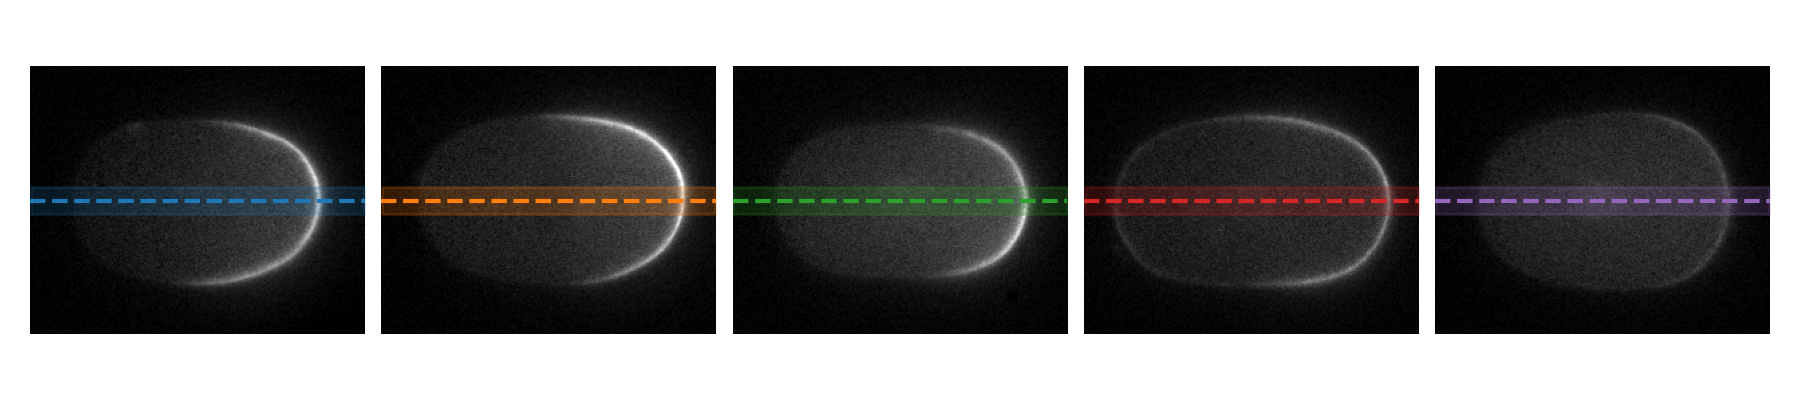

In [4]:
fig, ax = plt.subplots(1, 5)

func(ax[0], df_pol[df_pol.Genotype == 'WT'].Path.iloc[0], 'tab:blue')
func(ax[1], df_pol[df_pol.Genotype == 'R163A'].Path.iloc[0], 'tab:orange')
func(ax[2], df_pol[df_pol.Genotype == 'R183-5A'].Path.iloc[0], 'tab:green')
func(ax[3], df_pol[df_pol.Genotype == 'AxA'].Path.iloc[1], 'tab:red')
func(ax[4], df_pol[df_pol.Genotype == 'C56S'].Path.iloc[0], 'tab:purple')

fig.set_size_inches(9, 2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
fig.savefig('Figs/imgs_pol.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


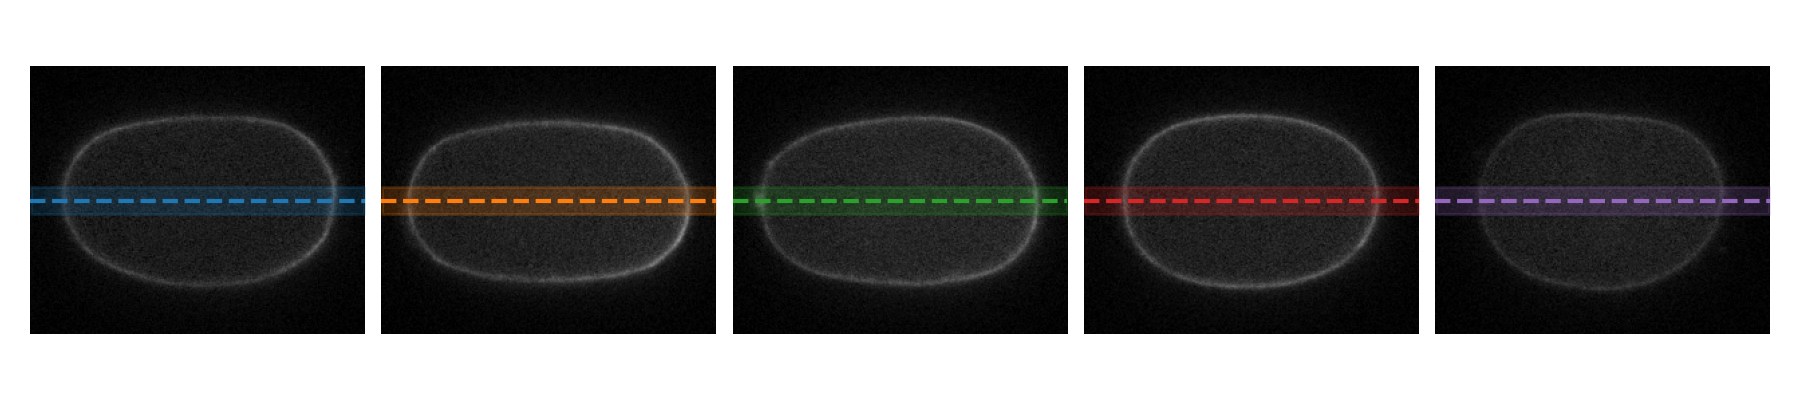

In [5]:
fig, ax = plt.subplots(1, 5)

func(ax[0], df_uni[df_uni.Genotype == 'WT'].Path.iloc[0], 'tab:blue')
func(ax[1], df_uni[df_uni.Genotype == 'R163A'].Path.iloc[0], 'tab:orange')
func(ax[2], df_uni[df_uni.Genotype == 'R183-5A'].Path.iloc[0], 'tab:green')
func(ax[3], df_uni[df_uni.Genotype == 'AxA'].Path.iloc[1], 'tab:red')
func(ax[4], df_uni[df_uni.Genotype == 'C56S'].Path.iloc[0], 'tab:purple')

fig.set_size_inches(9, 2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
fig.savefig('Figs/imgs_uni.png', dpi=600, transparent=True)

### Cross sections

In [6]:
def func(ax, path, c):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI_fit.txt')
    rotated = rotated_embryo(img, roi, 250, 200, 3)
    profile = np.mean(rotated[90:110, :], axis=0)
    x = np.arange(250) * 0.255
    ax.plot(x, profile / 1000, c=c)
    ax.set_ylim(0, 22)
    ax.set_yticks([0, 5, 10, 15, 20])
    ax.set_yticklabels(['', '', '', '', ''])
    ax.set_xlabel('Position (μm)')
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xlim(0, 250 * 0.255)

<IPython.core.display.Javascript object>


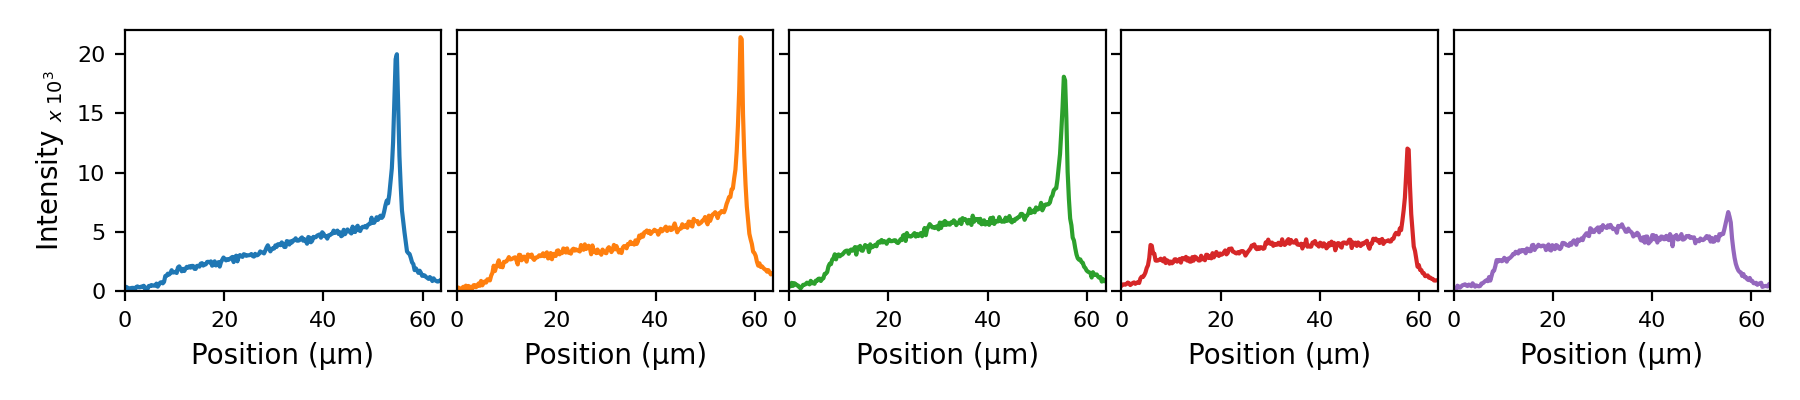

In [7]:
fig, ax = plt.subplots(1, 5)

func(ax[0], df_pol[df_pol.Genotype == 'WT'].Path.iloc[0], 'tab:blue')
func(ax[1], df_pol[df_pol.Genotype == 'R163A'].Path.iloc[0], 'tab:orange')
func(ax[2], df_pol[df_pol.Genotype == 'R183-5A'].Path.iloc[0], 'tab:green')
func(ax[3], df_pol[df_pol.Genotype == 'AxA'].Path.iloc[1], 'tab:red')
func(ax[4], df_pol[df_pol.Genotype == 'C56S'].Path.iloc[0], 'tab:purple')
ax[0].set_yticklabels(['0', '5', '10', '15', '20'])
ax[0].set_ylabel('Intensity ' + r'$_{x\;10^{3}}$')

fig.set_size_inches(9, 2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
fig.savefig('Figs/cross_sections_pol.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


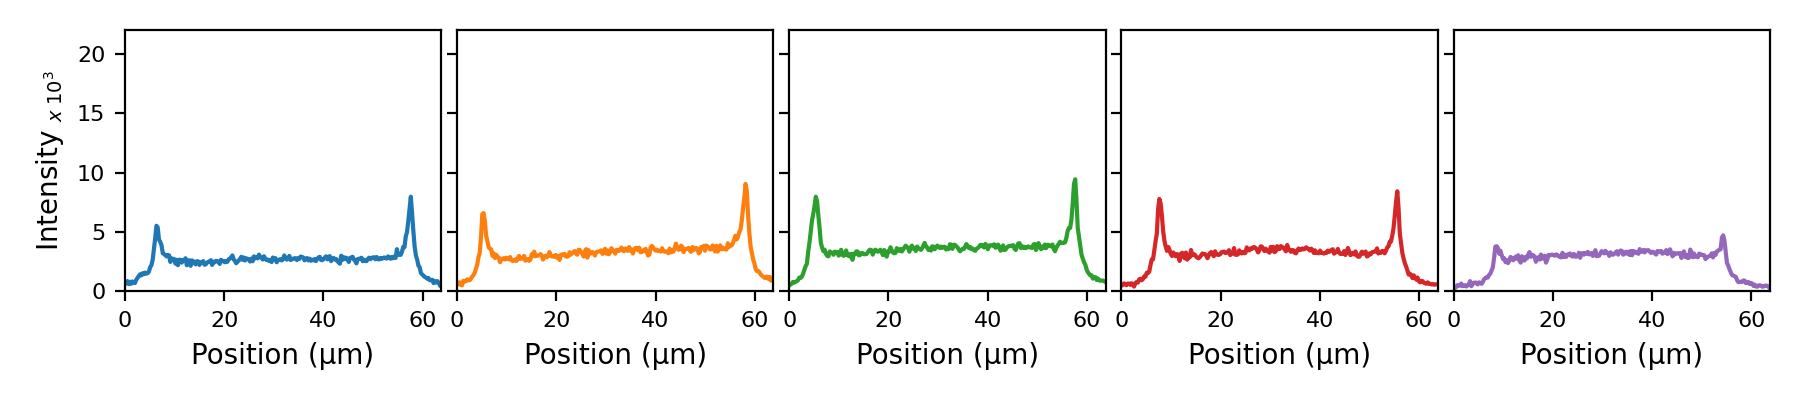

In [8]:
fig, ax = plt.subplots(1, 5)

func(ax[0], df_uni[df_uni.Genotype == 'WT'].Path.iloc[0], 'tab:blue')
func(ax[1], df_uni[df_uni.Genotype == 'R163A'].Path.iloc[0], 'tab:orange')
func(ax[2], df_uni[df_uni.Genotype == 'R183-5A'].Path.iloc[0], 'tab:green')
func(ax[3], df_uni[df_uni.Genotype == 'AxA'].Path.iloc[1], 'tab:red')
func(ax[4], df_uni[df_uni.Genotype == 'C56S'].Path.iloc[0], 'tab:purple')
ax[0].set_yticklabels(['0', '5', '10', '15', '20'])
ax[0].set_ylabel('Intensity ' + r'$_{x\;10^{3}}$')

fig.set_size_inches(9, 2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
fig.savefig('Figs/cross_sections_uni.png', dpi=600, transparent=True)

### Dosage

<IPython.core.display.Javascript object>


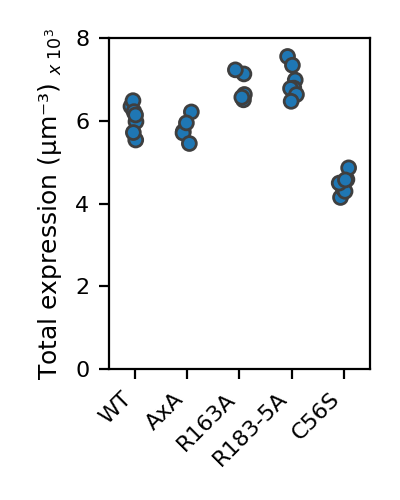

In [26]:
fig, ax = plt.subplots()
sns.stripplot(data=df_pol, x='Genotype', y='Total', ax=ax, order=order, linewidth=1, color='tab:blue')
# sns.barplot(data=df_pol, x='Genotype', y='Total', ax=ax, alpha=0.2, errwidth=0, order=order)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylim(0, 8)
ax.set_ylabel('Total expression (μm⁻³) ' + r'$_{x\;10^{3}}$', fontsize=9)
fig.set_size_inches(2, 2.5)
fig.tight_layout()
fig.savefig('Figs/dosage_pol.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


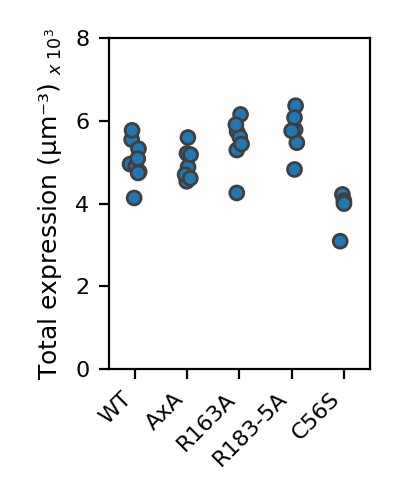

In [25]:
fig, ax = plt.subplots()
sns.stripplot(data=df_uni, x='Genotype', y='Total', ax=ax, order=order, linewidth=1, color='tab:blue')
# sns.barplot(data=df_uni, x='Genotype', y='Total', ax=ax, alpha=0.2, errwidth=0, order=order)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylim(0, 8)
ax.set_ylabel('Total expression (μm⁻³) ' + r'$_{x\;10^{3}}$', fontsize=9)
fig.set_size_inches(2, 2.5)
fig.tight_layout()
fig.savefig('Figs/dosage_uni.png', dpi=600, transparent=True)

### Cytoplasmic concentration

<IPython.core.display.Javascript object>


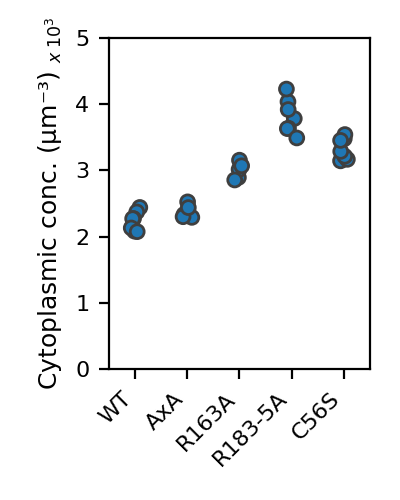

In [28]:
fig, ax = plt.subplots()
sns.stripplot(data=df_pol, x='Genotype', y='Cyt', ax=ax, order=order, linewidth=1, color='tab:blue')
# sns.barplot(data=df_pol, x='Genotype', y='Cyt', ax=ax, alpha=0.2, errwidth=0, order=order)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylim(0, 5)
ax.set_ylabel('Cytoplasmic conc. (μm⁻³) ' + r'$_{x\;10^{3}}$', fontsize=9)
fig.set_size_inches(2, 2.5)
fig.tight_layout()
fig.savefig('Figs/cyt_pol.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


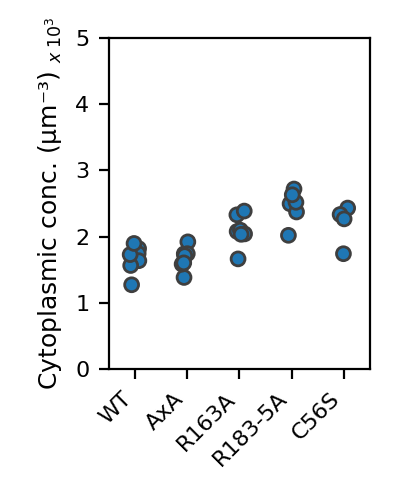

In [27]:
fig, ax = plt.subplots()
sns.stripplot(data=df_uni, x='Genotype', y='Cyt', ax=ax, order=order, linewidth=1, color='tab:blue')
# sns.barplot(data=df_uni, x='Genotype', y='Cyt', ax=ax, alpha=0.2, errwidth=0, order=order)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylim(0, 5)
ax.set_ylabel('Cytoplasmic conc. (μm⁻³) ' + r'$_{x\;10^{3}}$', fontsize=9)
fig.set_size_inches(2, 2.5)
fig.tight_layout()
fig.savefig('Figs/cyt_uni.png', dpi=600, transparent=True)

### Membrane concentration

<IPython.core.display.Javascript object>


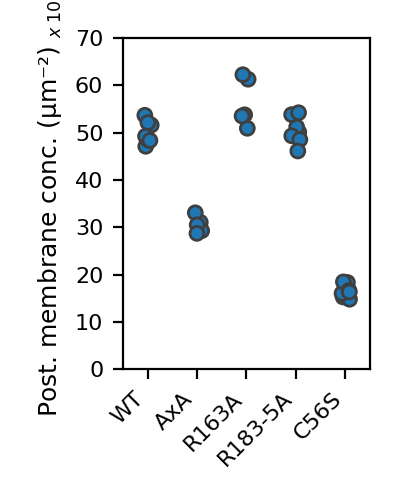

In [29]:
fig, ax = plt.subplots()
sns.stripplot(data=df_pol, x='Genotype', y='Mem post', ax=ax, order=order, linewidth=1, color='tab:blue')
# sns.barplot(data=df_pol, x='Genotype', y='Mem post', ax=ax, alpha=0.2, errwidth=0, order=order)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylim(0, 70)
ax.set_ylabel('Post. membrane conc. (μm⁻²) ' + r'$_{x\;10^{3}}$', fontsize=9)
fig.set_size_inches(2, 2.5)
fig.tight_layout()
fig.savefig('Figs/mem_pol.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


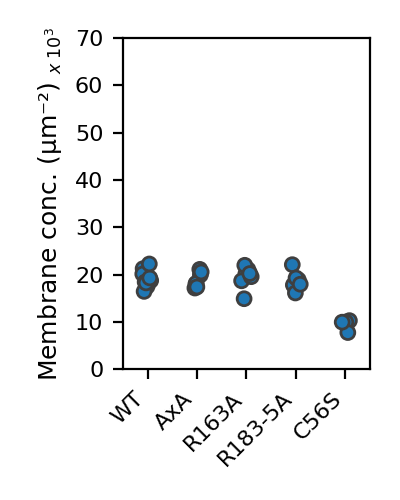

In [30]:
fig, ax = plt.subplots()
sns.stripplot(data=df_uni, x='Genotype', y='Mem tot', ax=ax, order=order, linewidth=1, color='tab:blue')
# sns.barplot(data=df_uni, x='Genotype', y='Mem tot', ax=ax, alpha=0.2, errwidth=0, order=order)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylim(0, 70)
ax.set_ylabel('Membrane conc. (μm⁻²) ' + r'$_{x\;10^{3}}$', fontsize=9)
fig.set_size_inches(2, 2.5)
fig.tight_layout()
fig.savefig('Figs/mem_uni.png', dpi=600, transparent=True)

### Concentration profiles

In [15]:
mems = res.groupby('Frame').apply(lambda x: x['Membrane signal'].to_numpy())
cyts = res.groupby('Frame').apply(lambda x: x['Cytoplasmic signal'].to_numpy())

In [16]:
def func(condition, genotype, ax, c):
    x = [(g == genotype) and (c == condition) for g, c in zip(df.Genotype, df.Condition)]
    m = mems[x].to_numpy() #/ cyts[x].to_numpy()
    mems_mean = np.mean(m, axis=0)
    mems_std = np.std(m, axis=0)
    ax.plot(mems_mean, c=c, label=condition)
#     for i in m:
#         ax.plot(i, c=c)
    ax.fill_between(np.arange(len(mems_mean)), mems_mean - mems_std, mems_mean + mems_std, alpha=0.2, color=c)

In [17]:
# fig, ax = plt.subplots()
# func('Uni', 'WT', ax, 'tab:blue')
# func('Uni', 'R163A', ax, 'tab:orange')
# func('Uni', 'R183-5A', ax, 'tab:green')
# func('Uni', 'AxA', ax, 'tab:red')
# func('Uni', 'C56S', ax, 'tab:purple')
# ax.set_ylim(bottom=0)
# ax.set_xlabel('Position')
# ax.set_ylabel('Membrane to cytoplasmic ratio (a.u.)')
# # ax.legend(frameon=False)
# fig.set_size_inches(4, 3)
# fig.tight_layout()

In [18]:
# fig, ax = plt.subplots()
# func('Pol', 'WT', ax, 'tab:blue')
# func('Pol', 'R163A', ax, 'tab:orange')
# func('Pol', 'R183-5A', ax, 'tab:green')
# func('Pol', 'AxA', ax, 'tab:red')
# func('Pol', 'C56S', ax, 'tab:purple')
# ax.set_ylim(bottom=0)
# ax.set_xlabel('Position')
# ax.set_ylabel('Membrane to cytoplasmic ratio (a.u.)')
# # ax.legend(frameon=False)
# fig.set_size_inches(4, 3)
# fig.tight_layout()

### Cyt vs mem

In [19]:
# fig, ax = plt.subplots()
# sns.scatterplot(data=df_uni, x='Cyt', y='Mem tot', hue='Genotype', ax=ax)
# ax.set_xlim(left=0)
# ax.set_ylim(bottom=0)
# fig.set_size_inches(3, 3)
# fig.tight_layout()

In [20]:
# fig, ax = plt.subplots()
# sns.scatterplot(data=df_pol, x='Cyt', y='Mem post', hue='Genotype', ax=ax)
# ax.set_xlim(left=0)
# ax.set_ylim(bottom=0)
# fig.set_size_inches(3, 3)
# fig.tight_layout()